In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn import preprocessing
import fm2p

In [3]:
# Goal: predict the current pupil position using the spike rate of one neuron.
# Maybe try doing it with the entire population?

In [4]:
preproc_path = r'K:\Mini2P\250306_DMM_DMM038_pillar\fm2\250306_DMM_DMM038_fm_2_preproc.h5'
data = fm2p.read_h5(preproc_path)

In [6]:
data['pupil_from_head'].shape

(30000,)

In [8]:
data['s2p_spks'].shape

(99, 30000)

In [35]:
# Spike rate
X = data['s2p_spks'].copy()[0,:]

# Pupil position
y = data['pupil_from_head'].copy()

In [36]:
# Anywhere that y has a NaN, drop both y and X
tokeep = ~np.isnan(y)
X = X[tokeep, np.newaxis]
y = y[tokeep, np.newaxis]

In [37]:
scalerX = preprocessing.StandardScaler().fit(X)
X_scaled = scalerX.transform(X)
scalerY = preprocessing.StandardScaler().fit(y)
y_scaled = scalerY.transform(y)

In [53]:
splitind = int((np.size(X_scaled)/4)*3)
X_train = X_scaled[:splitind]
y_train = y_scaled[:splitind]
X_test = X_scaled[splitind:]
y_test = y_scaled[splitind:]

In [ ]:
reg = sklearn.linear_model.LinearRegression(
    fit_intercept=True
).fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [64]:
reg = sklearn.linear_model.Ridge(alpha=.5).fit(X_train, y_train)
y_hat = reg.predict(X_test)

(array([3.000e+00, 0.000e+00, 2.700e+01, 5.350e+02, 3.369e+03, 6.542e+03,
        6.461e+03, 3.408e+03, 7.730e+02, 4.500e+01]),
 array([-1.        , -0.83225355, -0.6645071 , -0.49676065, -0.3290142 ,
        -0.16126775,  0.0064787 ,  0.17422515,  0.3419716 ,  0.50971805,
         0.6774645 ]),
 <BarContainer object of 10 artists>)

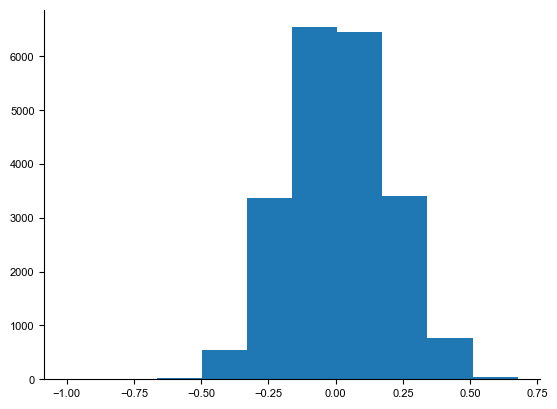

In [79]:
plt.hist(y_train/np.max(np.abs(y_train)))

In [82]:
usey = y_train+np.min(y_train)
usey = usey/np.max(usey)
reg = sklearn.linear_model.TweedieRegressor(
    power=2,
    link='log'
).fit(X_train, usey)
y_hat = reg.predict(X_test)

Text(0, 0.5, 'y_hat')

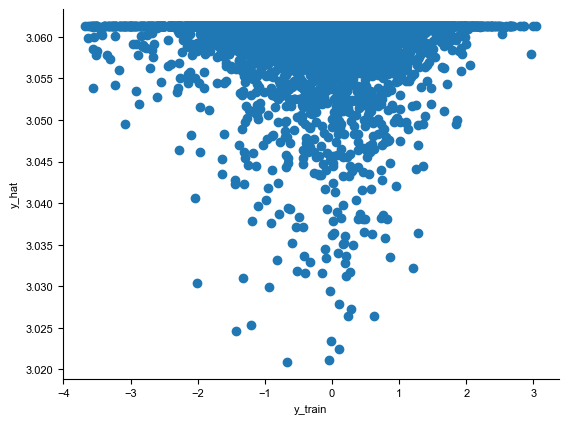

In [86]:
plt.scatter(y_test, y_hat)
plt.xlabel('y_train')
plt.ylabel('y_hat')

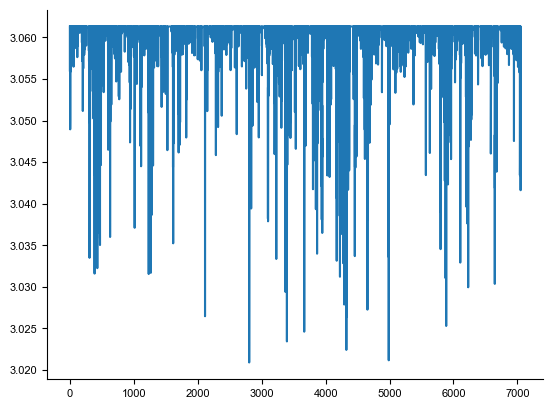

In [87]:
plt.plot(y_hat)

(array([3.000e+00, 1.600e+01, 1.320e+02, 8.840e+02, 4.667e+03, 8.897e+03,
        8.460e+03, 4.213e+03, 8.950e+02, 5.100e+01]),
 array([  7.9353739 ,  18.71358834,  29.49180278,  40.27001722,
         51.04823166,  61.8264461 ,  72.60466054,  83.38287497,
         94.16108941, 104.93930385, 115.71751829]),
 <BarContainer object of 10 artists>)

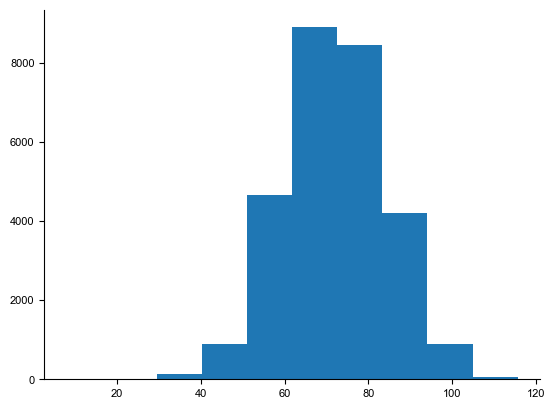

In [89]:
plt.hist(y)